#### Import libraries

In [48]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import pickle

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

#### Loading and reading the database

In [4]:
df = pd.read_csv('../data/marketing_investimento.csv')
df.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


#### Exploratory data analysis

In [5]:
""""Since there is no null data, there no will be
no need to perform data processing"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


##### Categorical variables

In [6]:
px.histogram(df, x='aderencia_investimento', text_auto=True)

In [7]:
""""Relationship between the categorical columns escolaridade, inadimplencia,
    estado_civil, fez_emprestimo with the column aderencia_investimento"""
    
categorical_columns = ['estado_civil','escolaridade', 'inadimplencia', 'fez_emprestimo']
for iter in categorical_columns:
    fig = px.histogram(df, x = iter, text_auto=True, color='aderencia_investimento', barmode='group')
    fig.show()

##### Numerical variables

In [8]:
""""Relationship between the numerical columns idade, saldo,
    tempo_ult_contato, ultimo_contato with the column aderencia_investimento"""
    
numerical_columns = ['idade', 'saldo', 'tempo_ult_contato', 'numero_contatos']
for iter in numerical_columns:
    fig = px.box(df, x = iter, color='aderencia_investimento')
    fig.show()

##### Separation of variables

In [9]:
X = df.drop('aderencia_investimento', axis=1)
y = df['aderencia_investimento']

##### Data transformation

In [10]:
cols = X.columns

#### One hot encoding transforms each of the classes of categorical variables into new columns, using the value 0 to represent the absence of the characteristic and 1 for the presence of the characteristic in the database sample.

In [11]:
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'),
    categorical_columns
),
    remainder='passthrough', sparse_threshold=0)

X = one_hot.fit_transform(X)

In [12]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(cols))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


#### Now, it is necessary to also make a transformation in the target variable, because it also has values ​​"no" and "yes".

In [13]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#### Division of variables into training and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=y)

#### Base model

##### This algorithm classifies all records in the database based on the category of the target variable with the highest frequency, that is, the one with the highest count in our database.

In [17]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

DummyClassifier()

In [47]:
print('Accuracy Dummy: ',dummy.score(X_test, y_test))

Accuracy Dummy:  0.6023622047244095


#### Decision Tree

In [26]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
tree.score(X_test, y_test)

0.65748031496063

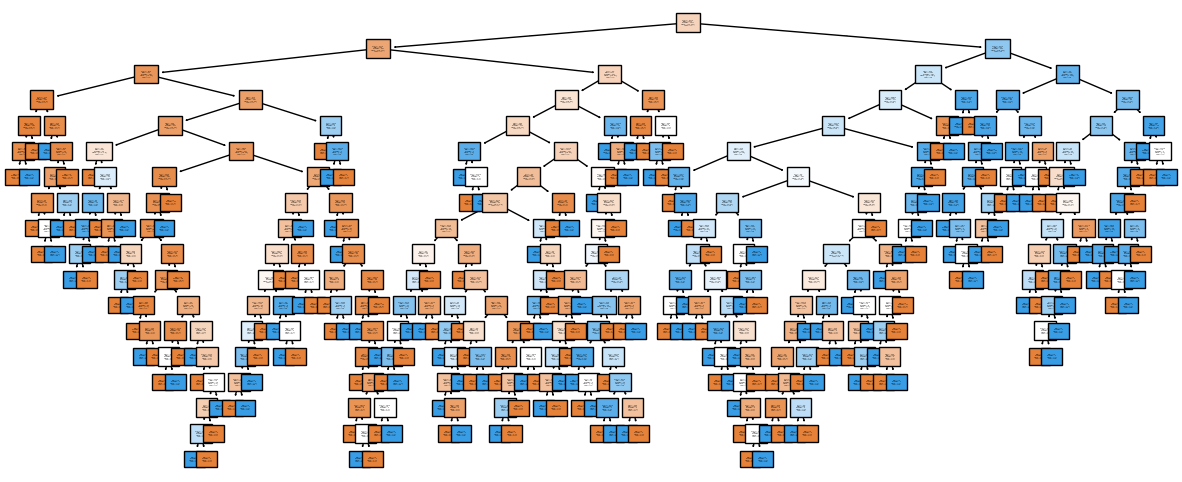

In [32]:
plt.figure(figsize=(15,6))
plot_tree(tree, filled=True, class_names=['nao','sim'], fontsize=1);

In [33]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [45]:
print('Accuracy Decision Tree: ', tree.score(X_test, y_test))

Accuracy Decision Tree:  0.7086614173228346


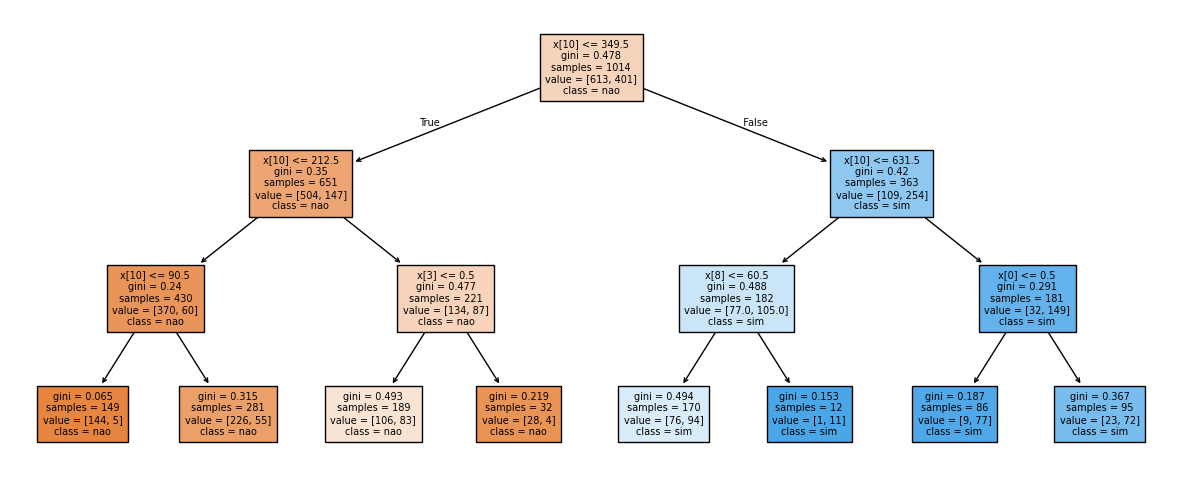

In [36]:
plt.figure(figsize=(15,6))
plot_tree(tree, filled=True, class_names=['nao','sim'], fontsize=7);

#### KNN

In [38]:
norm = MinMaxScaler()
X_train_nomr = norm.fit_transform(X_train)

In [40]:
knn = KNeighborsClassifier()
knn.fit(X_train_nomr, y_train)

KNeighborsClassifier()

In [46]:
X_test_norm = norm.transform(X_test)
print('Accuracy KNN:' , knn.score(X_test_norm, y_test))

Accuracy KNN: 0.6771653543307087


#### Save models

In [49]:
models = [one_hot, dummy, tree, knn]
name_files = ['model_onehotenc','model_dummy', 'model_tree,','model_knn']
for name, model in zip(name_files, models):
    with open(name, 'wb') as file:
        pickle.dump(models, file)